<a href="https://colab.research.google.com/github/moshekranc-git/pythonplayground/blob/master/homecredit1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction

home-credit-default-risk/application_train.csv

In [0]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# File system manangement
import os

# Suppress warnings
import warnings
#warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter


Training data shape:  (250491, 122)


Head
    SK_ID_CURR  TARGET  ... AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR
0      100002       1  ...                       0.0                        1.0
1      100003       0  ...                       0.0                        0.0
2      100004       0  ...                       0.0                        0.0
3      100006       0  ...                       NaN                        NaN
4      100007       0  ...                       0.0                        0.0

[5 rows x 122 columns]


dtypes
 SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: obje

float64    103
object      16
int64        3
dtype: int64

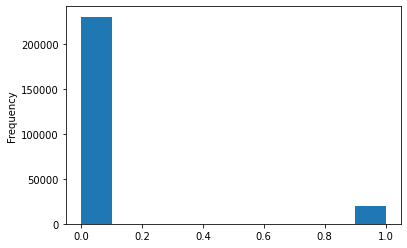

In [24]:
# Training data
app_train = pd.read_csv('application_train.csv')
print('Training data shape: ', app_train.shape)
print('\n\nHead\n', app_train.head())
print('\n\ndtypes\n', app_train.dtypes)
print('\n\ndtype value counts\n', app_train.dtypes.value_counts())
print('\n\nDescribe\n')
app_train.describe()

# summarize the class distribution
target = app_train['TARGET'].values
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))
app_train['TARGET'].astype(int).plot.hist();

# Number of each type of column
app_train.dtypes.value_counts()



In [0]:
# Function to calculate missing values by column 
def missing_values_table(df):
  # Total missing values
  mis_val = df.isnull().sum()
        
  # Percentage of missing values
  mis_val_percent = 100 * df.isnull().sum() / len(df)
        
  # Make a table with the results
  mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
  # Rename the columns
  mis_val_table_ren_columns = mis_val_table.rename(
  columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
  # Sort the table by percentage of missing descending
  mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
            '% of Total Values', ascending=False).round(1)
        
  # Print some summary information
  print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
  # Return the dataframe with missing information
  return mis_val_table_ren_columns

In [26]:
# Missing values statistics
missing_values = missing_values_table(app_train)
missing_values.head(50)

Your selected dataframe has 122 columns.
There are 112 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MODE,175184,69.9
COMMONAREA_MEDI,175184,69.9
COMMONAREA_AVG,175184,69.9
NONLIVINGAPARTMENTS_MEDI,174033,69.5
NONLIVINGAPARTMENTS_MODE,174033,69.5
NONLIVINGAPARTMENTS_AVG,174033,69.5
FONDKAPREMONT_MODE,171446,68.4
LIVINGAPARTMENTS_AVG,171389,68.4
LIVINGAPARTMENTS_MODE,171389,68.4
LIVINGAPARTMENTS_MEDI,171389,68.4


In [27]:
# Number of unique classes in each object column
print('categorical columns: num unique values')
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

categorical columns: num unique values


NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               9
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [28]:
# Load Test data 
app_test = pd.read_csv('application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,...,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13976,-1866,-2000.0,-4208,NaN,1,1,0,1,1,0,Sales staff,4.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Business Entity Type 3,...,0.2446,0.3739,0.0388,0.0817,reg oper account,block of flats,0.3700,Panel,No,0.0,0.0,0.0,0.0,-1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,-13040,-2191,-4000.0,-4262,16.0,1,1,1,1,0,0,NaN,3.0,2,2,FRIDAY,5,0,0,0,0,1,1,Business Entity Type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-821.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


for any categorical variable (dtype == object) with 2 unique categories, we will use label encoding, and for any categorical variable with more than 2 unique categories, we will use one-hot encoding.



Note: For machine learning, you almost definitely want to use sklearn.OneHotEncoder. The sklearn encoder creates a function which persists and can then be applied to new data sets which use the same categorical variables, with consistent results.

Consider what happens if X_test contains different levels than X_train for one of its variables. For example, let's say X_train["color"] contains only "red" and "green", but in addition to those, X_test["color"] sometimes contains "blue".

If we use pd.get_dummies, X_test will end up with an additional "color_blue" column which X_train doesn't have, and the inconsistency will probably break our code later on, especially if we are feeding X_test to an sklearn model which we trained on X_train.

And if we want to process the data like this in production, where we're receiving a single example at a time, pd.get_dummies won't be of use.

With sklearn.OneHotEncoder on the other hand, once we've created the encoder, we can reuse it to produce the same output every time, with columns only for "red" and "green". And we can explicitly control what happens when it encounters the new level "blue": if we think that's impossible, then we can tell it to throw an error with handle_unknown="error"; otherwise we can tell it to continue and simply set the red and green columns to 0, with handle_unknown="ignore"

In [0]:
# This code uses pd.get_dummies
# Advantage over OneHotEncoder: preserves the data in a DataFrame rather
#     than a numpy array, e.g., preserves column names for future data analysis
# Disadvantage: requires a bit more work to ensure train and test data
#     end up with the same columns in the same order
def OneHotEnc (train, test, train_target=''):
  
  # Remove target column from the training data before we encode
  if train_target != '':
    train_labels = train[train_target]
    train = train.drop(train_target, axis=1)
  
  # select categorical features
  cat_columns = train.select_dtypes(include=['object', 'bool']).columns
  print('cat_columns =', cat_columns, '\n')

  # build dummy features in training data
  train_processed = pd.get_dummies(train, prefix_sep="__",
                              columns=cat_columns)
  
  # capture new column names
  cat_dummies = [col for col in train_processed 
               if "__" in col 
               and col.split("__")[0] in cat_columns]
  
  # save the list of columns so we can enforce the order of columns later on
  processed_columns = list(train_processed.columns[:])

  # build dummy features in test data
  test_processed = pd.get_dummies(test, prefix_sep="__", 
                                   columns=cat_columns)
  
  # We may have test columns that are missing in train - remove them from test
  for col in test_processed.columns:
    if ("__" in col) and (col.split("__")[0] in cat_columns) and col not in cat_dummies:
        print("Removing additional feature {}".format(col))
        test_processed.drop(col, axis=1, inplace=True)

  # We may have train columns that are missing in test - add them to test with value=0
  for col in cat_dummies:
    if col not in test_processed.columns:
        print("Adding missing feature {}".format(col))
        test_processed[col] = 0

  # We now have the same features in train and test
  # But they may not be in the same order - re-order them
  test_processed = test_processed[processed_columns]

  # Add back target column to training data
  if train_target != '':
    train_processed['TARGET'] = train_labels

  return train_processed, test_processed


In [30]:
app_train, app_test = OneHotEnc (app_train, app_test, 'TARGET')
print('\nTraining data shape: ', app_train.shape)
print('\nTest data shape: ', app_test.shape)


cat_columns = Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object') 

Adding missing feature CODE_GENDER__XNA
Adding missing feature NAME_INCOME_TYPE__Maternity leave
Adding missing feature NAME_INCOME_TYPE__Work
Adding missing feature NAME_FAMILY_STATUS__Unknown

Training data shape:  (250491, 247)

Test data shape:  (48744, 246)


In [58]:
# not the best way - skip this
# experimental - does the same thing as the next section, but more elegantly

# split into inputs and outputs
train_labels = app_train['TARGET']
app_train = app_train.drop('TARGET', axis=1)

# select categorical and numerical features
cat_ix = app_train.select_dtypes(include=['object', 'bool']).columns
num_ix = app_train.select_dtypes(include=['number', 'int64', 'float64']).columns

print('cat_ix=', cat_ix, '\n')
print('num_ix=', num_ix, '\n')

print('\nbefore:\n', np.isnan(app_train[num_ix]))
app_train[num_ix] = app_train[num_ix].fillna(0)
app_test[num_ix] = app_test[num_ix].fillna(0)
print('\nafter:\n', np.isnan(app_train[num_ix]))

app_train[cat_ix] = app_train[cat_ix].fillna('UNKNOWN')
app_test[cat_ix] = app_test[cat_ix].fillna('UNKNOWN')

# fit_transform and transform take data frames, but return numpy arrays
# This means all column info is lost
# So, we must save the info before doing the transform, then add it back into the result
app_train_copy = app_train.copy()
app_test_copy = app_test.copy()

# impute missing values, one hot encode categorical
steps = [ ('si1', SimpleImputer(strategy='constant',
                   fill_value='MISSING'), cat_ix),
          ('c',OneHotEncoder(handle_unknown='ignore'),cat_ix), 
          ('si2', SimpleImputer(strategy='median'),num_ix)
         ]
ct = ColumnTransformer(steps)
print('\nabout to fit_transform')
app_train_array = ct.fit_transform(app_train)
print('about to transform\n')
app_test_array = ct.transform(app_test)

# Turn the array back into a data frame, with column data intact
app_train = pd.DataFrame(app_train_array, index=app_train_copy.index, 
                         columns=app_train_copy.columns)
app_test = pd.DataFrame(app_test_array, index=app_test_copy.index, 
                         columns=app_test_copy.columns)

# Add the target back in
app_train['TARGET'] = train_labels

print('\nTraining data shape: ', app_train.shape)
print('\nTest data shape: ', app_test.shape)

cat_ix = app_train.select_dtypes(include=['object', 'bool']).columns
num_ix = app_train.select_dtypes(include=['number', 'int64', 'float64']).columns
print('cat_ix=', cat_ix, '\n')
print('num_ix=', num_ix, '\n')

cat_ix= Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object') 

num_ix= Index(['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=105) 


before:
         SK_ID_CURR  ...  AMT_REQ_CREDIT_B

AssertionError: ignored

In [0]:
# not the best way - skip this

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Add the target back in
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

0 columns were label encoded.
Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)
Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


The numbers in the DAYS_BIRTH column are negative because they are recorded relative to the current loan application. To see these stats in years, we can mutliple by -1 and divide by the number of days in a year:

DAYS_BIRTH: count    250490.000000
mean         43.941329
std          11.972466
min          20.517808
25%          33.997260
50%          43.156164
75%          53.934247
max          69.043836
Name: DAYS_BIRTH, dtype: float64

DAYS_EMPLOYED count    250490.000000
mean      63886.906200
std      141337.344979
min      -17546.000000
25%       -2764.000000
50%       -1214.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64
The non-anomalies default on 8.70% of loans
The anomalies default on 5.44% of loans
There are 45156 anomalous days of employment


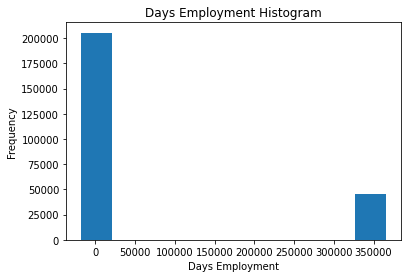

In [31]:
# data exploration
print ('DAYS_BIRTH:', (app_train['DAYS_BIRTH'] / -365 ).describe())

print('\nDAYS_EMPLOYED', app_train['DAYS_EMPLOYED'].describe())
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

anom = app_train[app_train['DAYS_EMPLOYED'] >= 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] < 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))



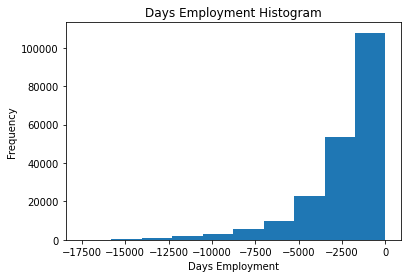

In [32]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] >= 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [33]:
# add the anomoly column to the test data as well
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries
